In [1]:
import pandas as pd
import seaborn as sns

from tqdm import tqdm
from collections import Counter

from litecoder.us_cities import USCityIndex
from litecoder.us_states import USStateIndex
from litecoder.models import Locality

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
mpl.style.use('seaborn-muted')

In [3]:
city_idx = USCityIndex()
city_idx.build()

2018-07-22 14:09:41,738 | INFO : Indexing name -> populations.


1000it [00:00, 32590.03it/s]

2018-07-22 14:09:41,801 | INFO : Indexing US cities.



1000it [00:00, 6577.81it/s]


In [4]:
state_idx = USStateIndex()
state_idx.build()

2018-07-22 14:09:42,874 | INFO : Indexing US states.


51it [00:00, 5744.08it/s]


In [5]:
city_idx

USCityIndex<11922 keys>

In [6]:
state_idx

USStateIndex<561 keys>

In [8]:
locs = pd.read_json('/Users/dclure/Projects/geovec-data/data/locations-90k.json', lines=True)

In [50]:
counts = Counter()
for r in tqdm(locs.dropna().itertuples()):
    
    cs = city_idx.query(r.location)
    
    if cs and cs[0].region.name_abbr == 'AL':
        counts[cs[0].wof_id] += r.count

89999it [00:13, 6461.14it/s]


In [46]:
rows = []
for wof_id, count in counts.items():
    loc = Locality.query.get(wof_id)
    rows.append((loc.name, loc.population, count))

In [47]:
df = pd.DataFrame(rows, columns=('name', 'pop', 'count'))

In [48]:
len(df)

86

In [49]:
Locality.query.filter(Locality.name_a1=='Alabama').count()

1005

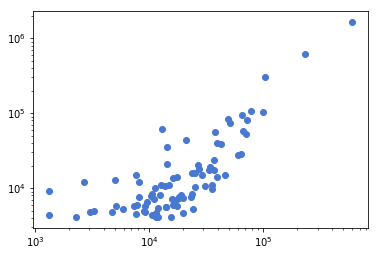

In [44]:
plt.xscale('log')
plt.yscale('log')
plt.scatter(df['pop'], df['count'])